
# Google Colab Jupyter Notebook for Profiling
---



# Preparations

In [1]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Tue Jan 10 14:29:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |      

You need to change the path bwlow to your own files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'add your path here'
#%cd '/content/drive/MyDrive/Colab Notebooks/AppliedGPU_finalProject'
!ls

#Compiling

In [ ]:
!make clean
!make all

# Executing

In [ ]:
!./bin/knn

#Debugging

In [ ]:
!printf "set cuda memcheck on\nset cuda api_failures stop\ncatch throw\nr\nbt\ninfo locals\nthread 1\nbt\n" > ./tmp.txt
!cuda-gdb -batch -x tmp.txt --args ./bin/knn

#Profiling

### Gprof

In [ ]:
!gprof ./bin/knn gmon.out

### CUDA_PROFILE

In [ ]:
!CUDA_PROFILE=1 ./bin/knn

Point classified as: BOM_JARDIM_DA_SERRA_-_MORRO_DA_IGREJA


In [ ]:
!cat cuda_profile_1.log

cat: cuda_profile_1.log: No such file or directory


### Nsys & Nvprof

In [ ]:
!nvprof --output-profile profilingV2.nvprof ./bin/knn

In [ ]:
#some of the possible parameters to add
#!nvprof --profile-childprocesses ./bin/knn
#--profile-all-processes
#--cpu-profiling on --cpu-thread-tracing on

!make clean
!make all
!nsys nvprof ./bin/knn

In [ ]:
#!nvprof --profile-childprocesses ./bin/knn
#--profile-all-processes
#--cpu-profiling on --cpu-thread-tracing on

#!nsys nvprof ./bin/knn
!make clean
!make all
!nvprof ./bin/knn

# Analysis & Plotting

###Imports

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##Plotting

### Plots for different block dimensions for calculating the k local nearest neighbours 

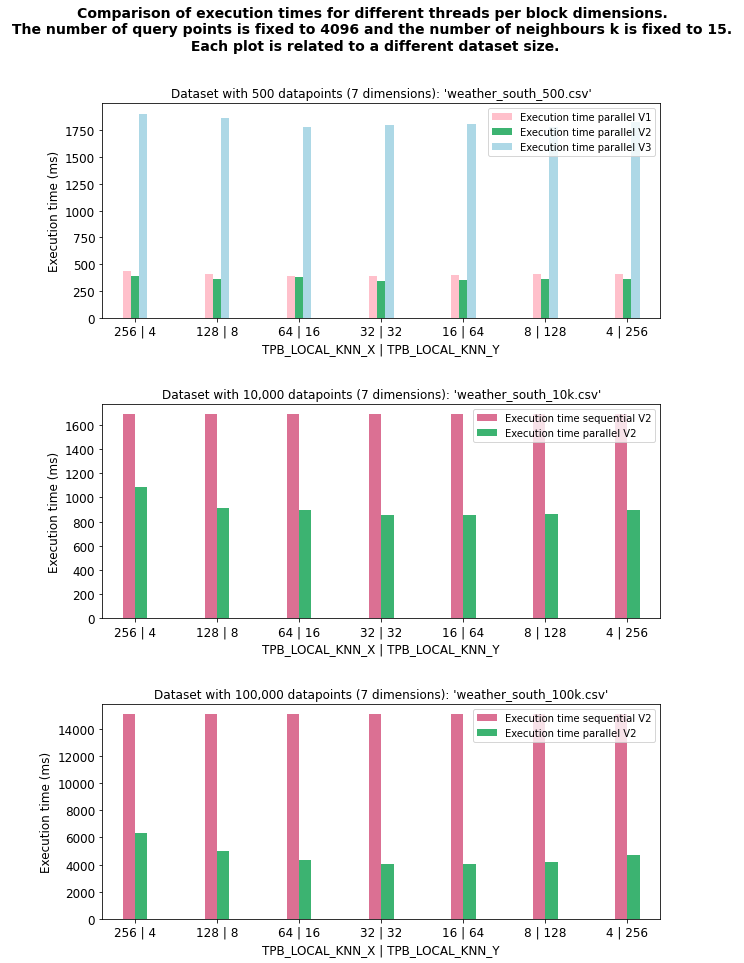

In [57]:
index_t = ['256 | 4', '128 | 8', '64 | 16', '32 | 32', '16 | 64', '8 | 128', '4 | 256', ]

#execution_time_sequentialV2_500 = [80.409, 80.409, 80.409, 80.409, 80.409, 80.409, 80.409,]
execution_time_parallelV1_500 = [434.8, 405.68, 394.07, 391.68, 397.73, 410.83, 411.3]
execution_time_parallelV2_500 = [391.87, 365.35, 377.76, 348.78, 352.35, 367.54, 362.31]
execution_time_parallelV3_500 = [1903.56, 1864.06, 1782.19, 1801.17, 1808.85, 1781.22, 1822.42] 

execution_time_sequentialV2_10k = [1687.97, 1687.97, 1687.97, 1687.97, 1687.97, 1687.97, 1687.97]
execution_time_parallelV1_10k = []
execution_time_parallelV2_10k = [1083.27, 912.99, 895.63, 852.29, 853.50, 863.63, 897.68]

execution_time_sequentialV2_100k = [15078.5, 15078.5, 15078.5, 15078.5, 15078.5, 15078.5, 15078.5]
execution_time_parallelV1_100k = []
execution_time_parallelV2_100k = [6332.68, 5005.34, 4343.66, 4074.96, 4039.49, 4196.41, 4716.92]
execution_time_parallelV3_100k = [7667.64, 6433.92, 5673.82, 5458.81, 5476.82, 5553.05, 5966.21]

df_500 = pd.DataFrame({
                   #'Execution time sequential V2': execution_time_sequentialV2_500,
                   'Execution time parallel V1': execution_time_parallelV1_500,
                   'Execution time parallel V2': execution_time_parallelV2_500,
                   'Execution time parallel V3': execution_time_parallelV3_500,
                   }, index=index_t)

df_10k = pd.DataFrame({
                   'Execution time sequential V2': execution_time_sequentialV2_10k,
                   #'Execution time parallel V1': execution_time_parallelV1_10k,
                   'Execution time parallel V2': execution_time_parallelV2_10k,
                   }, index=index_t)

df_100k = pd.DataFrame({
                   'Execution time sequential V2': execution_time_sequentialV2_100k,
                   #'Execution time parallel V1': execution_time_parallelV1_100k,
                   'Execution time parallel V2': execution_time_parallelV2_100k,
                   #'Execution time parallel V3': execution_time_parallelV3_100k,
                   }, index=index_t)


width = 0.3

fig, axes = plt.subplots(nrows = 3, ncols = 1)

ax = df_500.plot.bar(ax = axes[0], width = width, rot = 0, alpha = 1, fontsize=12, color={"Execution time sequential V2": "palevioletred", "Execution time parallel V1": "pink", "Execution time parallel V2": "mediumseagreen", "Execution time parallel V3": "lightblue"})
ax.set_title("Dataset with 500 datapoints (7 dimensions): 'weather_south_500.csv'")
ax.set_xlabel("TPB_LOCAL_KNN_X | TPB_LOCAL_KNN_Y", fontsize=12)
ax.set_ylabel("Execution time (ms)", fontsize=12)

ax = df_10k.plot.bar(ax = axes[1], width = width, rot = 0, alpha = 1, fontsize=12, color={"Execution time sequential V2": "palevioletred", "Execution time parallel V2": "mediumseagreen"})
ax.set_title("Dataset with 10,000 datapoints (7 dimensions): 'weather_south_10k.csv'")
ax.set_xlabel("TPB_LOCAL_KNN_X | TPB_LOCAL_KNN_Y", fontsize=12)
ax.set_ylabel("Execution time (ms)", fontsize=12)

ax = df_100k.plot.bar(ax = axes[2], width = width, rot = 0, alpha = 1, fontsize=12, color={"Execution time sequential V2": "palevioletred", "Execution time parallel V2": "mediumseagreen",  "Execution time parallel V3": "lightblue"})
ax.set_title("Dataset with 100,000 datapoints (7 dimensions): 'weather_south_100k.csv'")
ax.set_xlabel("TPB_LOCAL_KNN_X | TPB_LOCAL_KNN_Y", fontsize=12)
ax.set_ylabel("Execution time (ms)", fontsize=12)

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Comparison of execution times for different threads per block dimensions.\n The number of query points is fixed to 4096 and the number of neighbours k is fixed to 15. \n Each plot is related to a different dataset size.", y=0.97, fontweight = "bold", fontsize = 14)
fig.set_size_inches(10, 15, forward=True)

### Plots for different values of k

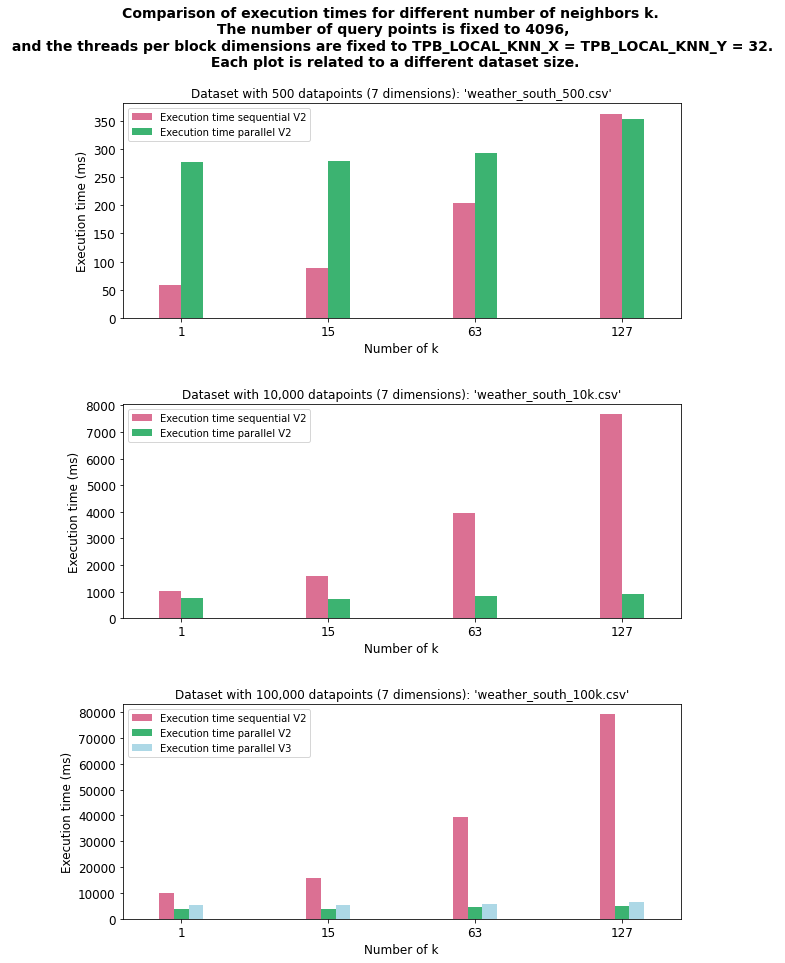

In [54]:
index_k = ['1','15', '63', '127']

execution_time_sequentialV2_500 = [58.806, 87.989, 204.59, 362.75]
execution_time_parallelV2_500 = [277.40, 278.98, 292.13, 352.89]

execution_time_sequentialV2_10k = [1013.90, 1583.82, 3961.73, 7669.80]
execution_time_parallelV2_10k = [765.91, 743.90, 838.17, 925.98]

execution_time_sequentialV2_100k = [9921.15, 15890.1, 39539.0, 79118.4]
execution_time_parallelV2_100k = [3855.97, 3959.50, 4437.08, 5003.18]
execution_time_parallelV3_100k = [5403.00, 5492.03, 5903.21, 6340.94]  

df_500 = pd.DataFrame({
                   'Execution time sequential V2': execution_time_sequentialV2_500,
                   'Execution time parallel V2': execution_time_parallelV2_500
                   }, index=index_k)

df_10k = pd.DataFrame({
                   'Execution time sequential V2': execution_time_sequentialV2_10k,
                   'Execution time parallel V2': execution_time_parallelV2_10k
                   }, index=index_k)

df_100k = pd.DataFrame({
                   'Execution time sequential V2': execution_time_sequentialV2_100k,
                   'Execution time parallel V2': execution_time_parallelV2_100k,
                   'Execution time parallel V3': execution_time_parallelV3_100k
                   }, index=index_k)


width = 0.3

fig, axes = plt.subplots(nrows = 3, ncols = 1)

ax = df_500.plot.bar(ax = axes[0], width = width, rot = 0, alpha = 1, fontsize=12, color={"Execution time sequential V2": "palevioletred", "Execution time parallel V2": "mediumseagreen"})
ax.set_title("Dataset with 500 datapoints (7 dimensions): 'weather_south_500.csv'")
ax.set_xlabel("Number of k", fontsize=12)
ax.set_ylabel("Execution time (ms)", fontsize=12)

ax = df_10k.plot.bar(ax = axes[1], width = width, rot = 0, alpha = 1, fontsize=12, color={"Execution time sequential V2": "palevioletred", "Execution time parallel V2": "mediumseagreen"})
ax.set_title("Dataset with 10,000 datapoints (7 dimensions): 'weather_south_10k.csv'")
ax.set_xlabel("Number of k", fontsize=12)
ax.set_ylabel("Execution time (ms)", fontsize=12)

ax = df_100k.plot.bar(ax = axes[2], width = width, rot = 0, alpha = 1, fontsize=12, color={"Execution time sequential V2": "palevioletred", "Execution time parallel V2": "mediumseagreen", "Execution time parallel V3": "lightblue"})
ax.set_title("Dataset with 100,000 datapoints (7 dimensions): 'weather_south_100k.csv'")
ax.set_xlabel("Number of k", fontsize=12)
ax.set_ylabel("Execution time (ms)", fontsize=12)

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Comparison of execution times for different number of neighbors k. \n The number of query points is fixed to 4096, \n and the threads per block dimensions are fixed to TPB_LOCAL_KNN_X = TPB_LOCAL_KNN_Y = 32. \n Each plot is related to a different dataset size.", y=0.97, fontweight = "bold", fontsize = 14)
fig.set_size_inches(10, 15, forward=True)

### Plots for different amount of query points

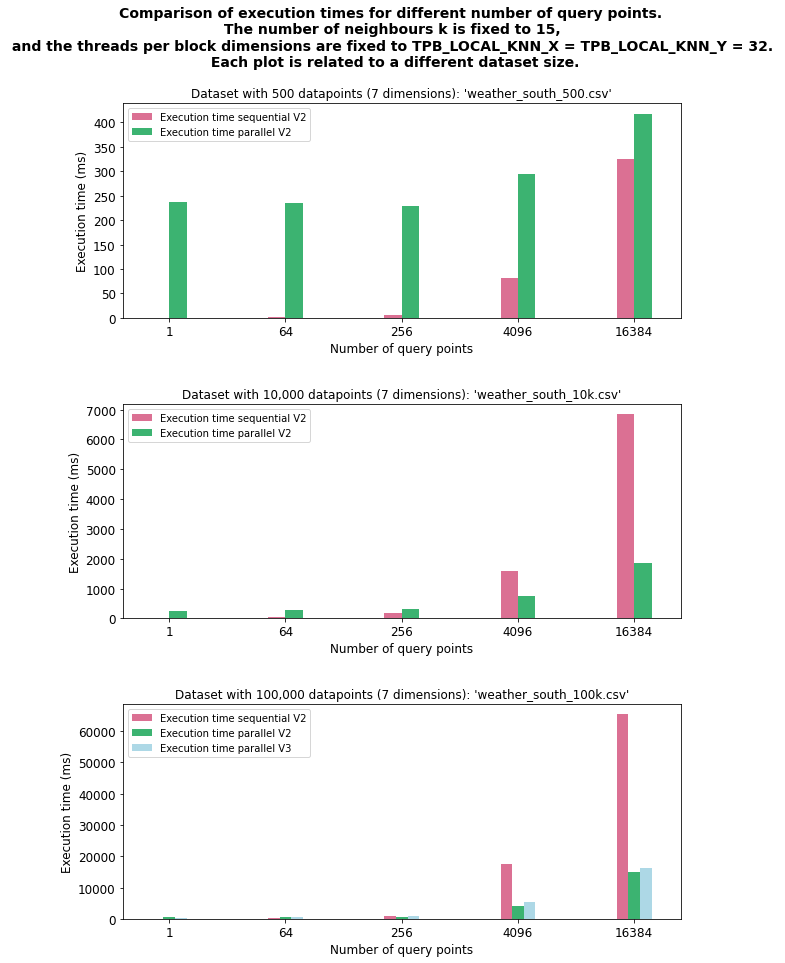

In [46]:
index_q = ['1','64', '256', '4096', '16384']

execution_time_sequentialV2_500 = [0.039981, 1.4769, 5.2947, 80.933, 324.16]
execution_time_parallelV2_500 = [236.07, 234.64, 228.92, 294.61, 417.34]

execution_time_sequentialV2_10k = [0.64793, 32.898, 170.24, 1572.44, 6851.95]
execution_time_parallelV2_10k = [252.11, 292.83, 317.65, 758.33, 1843.21]

execution_time_sequentialV2_100k = [3.8689, 249.01, 996.18, 17626.9, 65312.2]
execution_time_parallelV2_100k = [416.00, 491.32, 685.28, 3978.97, 14802.0] 
execution_time_parallelV3_100k = [396.34, 503.05, 1020.04, 5391.90, 16221.5]

df_500 = pd.DataFrame({
                   'Execution time sequential V2': execution_time_sequentialV2_500,
                   'Execution time parallel V2': execution_time_parallelV2_500,
                   }, index=index_q)

df_10k = pd.DataFrame({
                   'Execution time sequential V2': execution_time_sequentialV2_10k,
                   'Execution time parallel V2': execution_time_parallelV2_10k,
                   }, index=index_q)

df_100k = pd.DataFrame({
                   'Execution time sequential V2': execution_time_sequentialV2_100k,
                   'Execution time parallel V2': execution_time_parallelV2_100k,
                   'Execution time parallel V3': execution_time_parallelV3_100k,
                   }, index=index_q)


width = 0.3

fig, axes = plt.subplots(nrows = 3, ncols = 1)

ax = df_500.plot.bar(ax = axes[0], width = width, rot = 0, alpha = 1, fontsize=12, color={"Execution time sequential V2": "palevioletred", "Execution time parallel V2": "mediumseagreen"})
ax.set_title("Dataset with 500 datapoints (7 dimensions): 'weather_south_500.csv'")
ax.set_xlabel("Number of query points", fontsize=12)
ax.set_ylabel("Execution time (ms)", fontsize=12)

ax = df_10k.plot.bar(ax = axes[1], width = width, rot = 0, alpha = 1, fontsize=12, color={"Execution time sequential V2": "palevioletred", "Execution time parallel V2": "mediumseagreen"})
ax.set_title("Dataset with 10,000 datapoints (7 dimensions): 'weather_south_10k.csv'")
ax.set_xlabel("Number of query points", fontsize=12)
ax.set_ylabel("Execution time (ms)", fontsize=12)

ax = df_100k.plot.bar(ax = axes[2], width = width, rot = 0, alpha = 1, fontsize=12, color={"Execution time sequential V2": "palevioletred", "Execution time parallel V2": "mediumseagreen", "Execution time parallel V3": "lightblue"})
ax.set_title("Dataset with 100,000 datapoints (7 dimensions): 'weather_south_100k.csv'")
ax.set_xlabel("Number of query points", fontsize=12)
ax.set_ylabel("Execution time (ms)", fontsize=12)

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Comparison of execution times for different number of query points. \n The number of neighbours k is fixed to 15, \n and the threads per block dimensions are fixed to TPB_LOCAL_KNN_X = TPB_LOCAL_KNN_Y = 32. \n Each plot is related to a different dataset size.", y=0.97, fontweight = "bold", fontsize = 14)
fig.set_size_inches(10, 15, forward=True)

### Plot for different dataset sizes

Text(0.5, 1, 'Comparison of execution times for different dataset sizes. \n The number of neighbours k is fixed to 15, \n number of query points are fixed to 4096, \n and the threads per block dimensions are fixed to TPB_LOCAL_KNN_X = TPB_LOCAL_KNN_Y = 32.')

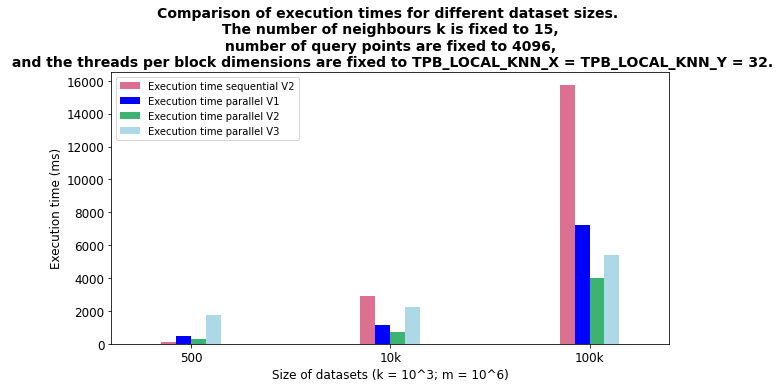

In [42]:
index_d = ['500','10k', '100k'] #, '1m'

execution_time_sequentialV2 = [82.114, 2936.21, 15748.1] #, 160280.0 
execution_time_parallelV1 = [490.41, 1160.88, 7216.22] #, 26000
execution_time_parallelV2 = [293.00, 745.24, 4018.32] #, 35431.18
execution_time_parallelV3 = [1764.44, 2241.01, 5382.87] #, 35241.83

df = pd.DataFrame({
                   'Execution time sequential V2': execution_time_sequentialV2,
                   'Execution time parallel V1': execution_time_parallelV1,
                   'Execution time parallel V2': execution_time_parallelV2,
                   'Execution time parallel V3': execution_time_parallelV3,
                   }, index=index_d)


width = 0.3

#fig, axes = plt.subplots(nrows = 2, ncols = 1)

ax = df.plot.bar(figsize = (10, 5), width = width, rot = 0, alpha = 1, fontsize=12, color={"Execution time sequential V2": "palevioletred", "Execution time parallel V1": "blue", "Execution time parallel V2": "mediumseagreen", "Execution time parallel V3": "lightblue"})
#ax.set_title("Comparison of different code implementations")
ax.set_xlabel("Size of datasets (k = 10^3; m = 10^6)", fontsize=12)
ax.set_ylabel("Execution time (ms)", fontsize=12)

#plt.subplots_adjust(hspace=0.4)
ax.set_title("Comparison of execution times for different dataset sizes. \n The number of neighbours k is fixed to 15, \n number of query points are fixed to 4096, \n and the threads per block dimensions are fixed to TPB_LOCAL_KNN_X = TPB_LOCAL_KNN_Y = 32.", y=1, fontweight = "bold", fontsize = 14)
#ax.set_size(10, 15, forward=True)